<a href="https://colab.research.google.com/github/AbinaKukanova/basics-ML-DL/blob/main/HW5_KukanovaAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Программирование и компьютерные науки, ФИКЛ ВШЭ

## Домашнее задание №5

## Общая информация

### О задании

Домашнее задание посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.


### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 14 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы, которые позднее будут учитываться в среднем по домашкам.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: *HW5_Username.ipynb*, где *Username* — Ваша фамилия и инициалы на латинице (например, *HW1_IvanovII.ipynb*). Далее файл нужно будет загрузить в [форму](https://forms.gle/8j1ibb5F3Hfu4f1p8).

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [124]:
import numpy as np

**1. (0.5 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [126]:
def max_element(arr):
    zero_elem = np.where(arr == 0)[0]
    if zero_elem.size == 0:
        return None
    next_elem = zero_elem + 1
    valid_elem = next_elem[next_elem < len(arr)]
    return arr[valid_elem].max()

x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
print(max_element(x))

5


**2. (0.5 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [127]:
def nearest_value(X, v):
    dist = np.abs(X - v)
    index = dist.argmin()
    row, col = np.unravel_index(index, X.shape)
    return X[row, col]

X = np.arange(0,10).reshape((2, 5))
v = 3.6
nearest_value(X, v)

4

**3. (0.5 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию numpy.random.randint).

In [138]:
def scale(X):
    means = X.mean(axis=0)
    stds = X.std(axis=0)
    stds[stds < 1] = 1.0
    return (X - means) / stds

np.random.seed(42)
X = np.random.randint(0, 100, size=(5, 3))
new_matrix = scale(X)
print(new_matrix)

[[-0.43361508  0.79149842 -0.9185736 ]
 [ 0.5090264  -0.16068013 -0.74416089]
 [ 1.02747921  0.61296494  0.82555349]
 [ 0.65042262  0.64272052  1.55227311]
 [-1.75331314 -1.88650376 -0.71509211]]


**4. (0.5 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [132]:
def get_stats(X):
  cur = {}
  cur['determinant'] = np.linalg.det(X)
  cur['trace'] = np.trace(X)
  cur['min'] = X.min()
  cur['max'] = X.max()
  cur['frobenius_norm'] = np.linalg.norm(X, 'fro')
  cur['eigenvalues'] = np.linalg.eigvals(X)
  cur['inverse'] = np.linalg.inv(X) if np.linalg.det(X) != 0 else None
  return cur


X = np.random.normal(10, 1, size=(10, 10))
cur = get_stats(X)
print(cur)

{'determinant': 16024.585622469782, 'trace': 101.92910088687435, 'min': 7.955576978180085, 'max': 12.656010091272043, 'frobenius_norm': 100.36950664439432, 'eigenvalues': array([99.99490443+0.j        , -2.18860885+0.j        ,
       -0.41965267+2.04494338j, -0.41965267-2.04494338j,
        1.01537095+2.24903719j,  1.01537095-2.24903719j,
        2.36279805+0.j        ,  0.90639407+0.34213641j,
        0.90639407-0.34213641j, -1.24421746+0.j        ]), 'inverse': array([[ 3.37614612e-01,  8.09381246e-01,  1.30047331e-01,
         3.51578846e-01,  5.83974286e-01, -9.97390737e-01,
        -8.34783131e-01,  1.74558541e-01,  1.33158692e-01,
        -7.07257711e-01],
       [ 6.13210382e-01,  7.09232574e-01, -5.84493377e-02,
        -3.21746069e-02,  7.76323102e-01, -9.42013406e-01,
        -3.70391737e-01,  1.36915810e-01, -1.30575530e-01,
        -6.74809561e-01],
       [-5.99293993e-02, -3.22970820e-01, -1.12796567e-01,
        -2.04351647e-01, -5.01422099e-01,  6.56943150e-01,
       

**5. (0.5 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [134]:
sp = []

for exp_num in range(100):
  a = np.random.randn(10, 10)
  b = np.random.randn(10, 10)
  c = np.dot(a, b)
  sp.append(c.max())

In [136]:
mean_value = np.mean(sp)
quant = np.quantile(sp, 0.95)

print(mean_value)
print(quant)

8.581495607453043
13.333467457800415


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HG7NV7)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [59]:
import pandas as pd
%matplotlib inline

df = pd.read_csv('2008.csv')

In [60]:
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0
69997,2008,9,24,3,1012.0,1012,1132.0,1132,YV,7058,...,7.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,20.0,22.0,0,NaN,0,0.0,0.0,15.0,0.0,6.0


**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [ ]:
df['CancellationCode'].value_counts() # A

CancellationCode
A    563
B    549
C    299
Name: count, dtype: int64

**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [61]:
print(df['Distance'].mean())

724.5082571428571


In [62]:
print(df['Distance'].max())
print(df['Distance'].min())

4962
31


**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [ ]:
df[df['Distance'] == 31]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1116,2008,12,30,2,1123.0,1007,1148.0,1033,AS,65,...,6.0,6.0,0,NaN,0,0.0,75.0,0.0,0.0,0.0
6958,2008,12,26,5,NaN,1007,NaN,1033,AS,65,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
17349,2008,8,18,1,NaN,1737,NaN,1801,AS,64,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
27534,2008,3,11,2,1611.0,1537,1630.0,1605,AS,64,...,4.0,5.0,0,NaN,0,0.0,25.0,0.0,0.0,0.0
46082,2008,8,9,6,1103.0,1036,1139.0,1100,AS,65,...,4.0,24.0,0,NaN,0,0.0,0.0,12.0,0.0,27.0
48112,2008,2,28,4,1535.0,1537,1603.0,1605,AS,64,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['Distance'][df['FlightNum'] == 65]

1116       31
1517      680
6326       82
6958       31
10113     571
14646    2454
15173    1005
26025     581
26109     571
26824    1747
32173    1747
32956    2454
33211    1005
37350      82
39438     571
43132     123
45031      82
46082      31
47168     581
47716     281
49369     682
50184     372
50888      82
50910     372
51841    1747
52459     581
52618     680
52779    1747
54909     581
57730    1747
57822    1747
59015    1005
64203      82
65662     123
66042     372
66529      82
68264     386
68338    2454
69305    1005
Name: Distance, dtype: int64

In [139]:
df['Distance'][df['FlightNum'] == 64]

501       533
1389      680
2619     2381
3869       82
4025     1005
4466      123
6778      359
7891     2381
7977     1747
8448      123
9615      533
10833     372
12352    1747
12980      82
13155    1747
17349      31
21304    1005
24750     680
25671     533
26323    1005
27534      31
29801     123
30053      82
31375    1005
31629     883
32242      82
33769    1747
41044    1747
43353     571
44649     571
44810      82
48020    1005
48112      31
55053     123
58530     571
61164     680
63028    1747
64319     414
67172     533
Name: Distance, dtype: int64

**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [65]:
df['Origin'].value_counts()

Origin
ATL    4134
ORD    3550
DFW    2793
DEN    2383
LAX    2082
       ... 
GST       1
ADK       1
PLN       1
INL       1
BLI       1
Name: count, Length: 297, dtype: int64

In [64]:
df['Origin'].value_counts().index[0]

'ATL'

**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [66]:
df.groupby('Origin')['AirTime'].mean()

Origin
ABE    88.266667
ABI    36.400000
ABQ    93.454321
ABY    35.714286
ACK    50.800000
         ...    
WRG    18.000000
XNA    85.945736
YAK    35.900000
YKM    79.000000
YUM    47.470588
Name: AirTime, Length: 297, dtype: float64

In [67]:
df.groupby('Origin')['AirTime'].mean().max()

205.2

**11. (1 балл)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [107]:
new_df = df.groupby('Origin').size().reset_index(name='Origin Size')

In [108]:
filtered_df = new_df[new_df['Origin Size'] >= 1000]

In [117]:
freq_df = df[df['DepDelay'] > 0].groupby('Origin').size().reset_index(name='Delay Freq')

In [118]:
filtered_df = filtered_df.merge(freq_df, on='Origin', how='inner')

In [119]:
filtered_df['Delay'] = filtered_df['Delay Freq'] / filtered_df['Origin Size']

In [121]:
filtered_df

,Origin,Origin Size,Delay Freq_x,Delay,Delay Freq_y,Delay Freq
0,ATL,4134,1739,0.420658,1739,1739
1,BOS,1162,376,0.323580,376,376
2,BWI,1032,467,0.452519,467,467
3,CLT,1250,498,0.398400,498,498
4,DEN,2383,1063,0.446076,1063,1063
5,DFW,2793,1283,0.459363,1283,1283
6,DTW,1610,569,0.353416,569,569
7,EWR,1389,710,0.511159,710,710
8,IAH,1795,841,0.468524,841,841
9,JFK,1201,444,0.369692,444,444


In [123]:
filtered_df.loc[filtered_df['Delay'].idxmax()]

Origin               EWR
Origin Size         1389
Delay Freq_x         710
Delay           0.511159
Delay Freq_y         710
Delay Freq           710
Name: 7, dtype: object

## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов.

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (1 балл)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [8]:
df.isnull().values.any() # Проверим, есть ли пропущенные значения в датасете

True

In [9]:
df.isnull().sum().sum() # Подсчитаем, сколько всего пропущенных в датасете

355215

In [10]:
df.isnull().any(axis=1).sum() # Объекты, в которых есть хотя бы одно пропущенное значение

70000

In [12]:
df.isnull().sum() # Можно посмотреть, сколько в каждом столбце-признаке есть пропущенные значения

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime               1399
CRSDepTime               0
ArrTime               1556
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum                820
ActualElapsedTime     1582
CRSElapsedTime           9
AirTime               1582
ArrDelay              1582
DepDelay              1399
Origin                   0
Dest                     0
Distance                 0
TaxiIn                1556
TaxiOut               1406
Cancelled                0
CancellationCode     68589
Diverted                 0
CarrierDelay         54747
WeatherDelay         54747
NASDelay             54747
SecurityDelay        54747
LateAircraftDelay    54747
dtype: int64

In [13]:
df.isnull().any().sum() # Количество признаков, в которых есть хотя бы одно пропущенное значение

16

Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [86]:
df['DepDelay'].isnull().sum() # Количество пропущенных значений в колонке DepDelay

1399

Вообщем, у нас есть две колонки DepTime(actual departure time) CRSDepTime(scheduled departure time). В колонке DepTime записано фактическое время вылета, а в колонке CRSDepTime записано время вылета по расписанию. Посмотрев все строки датасета, по которым DepDelay равно Nan,  то есть отсутствует, можно увидеть, что DepTime и ArrTime(actual arrival time) тоже равно Nan.



Можно заметить, что во всех сроках датасета, где DepDelay имеет пропущенное значение, в колонке cancelled во всех строках записана единица, то есть все данные рейсы были отменены. Тогда, я думаю, что этот признак cancelled, равный единице, можно исключить из рассмотрения.

In [18]:
pd.set_option('display.max_columns', None)

In [22]:
df[df['DepDelay'].isnull()][200:]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
8328,2008,12,26,5,NaN,1630,NaN,1735,EV,4917,N754EV,NaN,65.0,NaN,NaN,NaN,TLH,ATL,223,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
8382,2008,9,12,5,NaN,1105,NaN,1225,MQ,3566,NaN,NaN,80.0,NaN,NaN,NaN,CRP,DFW,354,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
8432,2008,3,27,4,NaN,2010,NaN,2118,OO,6439,N932SW,NaN,68.0,NaN,NaN,NaN,ORD,CWA,213,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
8449,2008,4,30,3,NaN,940,NaN,1055,9E,5900,NaN,NaN,75.0,NaN,NaN,NaN,MEM,MGM,280,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
8480,2008,12,18,4,NaN,725,NaN,1012,CO,768,NaN,NaN,347.0,NaN,NaN,NaN,EWR,LAS,2227,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69818,2008,6,9,1,NaN,1645,NaN,1800,MQ,3627,NaN,NaN,75.0,NaN,NaN,NaN,DFW,CRP,354,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
69836,2008,1,25,5,NaN,938,NaN,1030,MQ,3254,NaN,NaN,52.0,NaN,NaN,NaN,ACT,DFW,89,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
69884,2008,12,26,5,NaN,1935,NaN,2116,NW,1430,N330NW,NaN,101.0,NaN,NaN,NaN,MEM,MKE,556,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
69918,2008,3,1,6,NaN,600,NaN,742,EV,4715,N635AS,NaN,102.0,NaN,NaN,NaN,MYR,ATL,317,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


In [7]:
# Удалим пропущенные значения и нули из этой колонки
df = df.dropna(subset=['DepDelay'])
df = df[df['DepDelay'] != 0]

In [103]:
df['DepDelay'].isnull().sum() # Проверим удалили мы все пропущенные значения

0

In [8]:
y = df['DepDelay'] # Выделим целевую переменную в отдельный вектор
y

0        16.0
1        16.0
2        -2.0
3        -3.0
4        -5.0
         ... 
69994    -5.0
69995   -11.0
69996    24.0
69998     6.0
69999    -1.0
Name: DepDelay, Length: 63404, dtype: float64

**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать.

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [9]:
features = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']
for feature in features:
  df[f'{feature}_Hour'] = [int(time // 100) if not pd.isnull(time) else pd.NA for time in df[feature]]
  df[f'{feature}_Minute'] = [int(time % 100) if not pd.isnull(time) else pd.NA for time in df[feature]]
  df = df.drop(feature, axis=1)

In [10]:
df

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,...,SecurityDelay,LateAircraftDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,2008,6,18,3,WN,242,N699SW,57.0,65.0,46.0,...,NaN,NaN,21,11,20,55,23,8,23,0
1,2008,6,4,3,XE,2380,N15980,124.0,138.0,108.0,...,NaN,NaN,14,26,14,10,17,30,17,28
2,2008,8,3,7,WN,1769,N464WN,138.0,155.0,125.0,...,NaN,NaN,11,43,11,45,15,1,15,20
3,2008,1,23,3,OO,3802,N465SW,102.0,111.0,79.0,...,NaN,NaN,11,41,11,44,13,23,13,35
4,2008,5,4,7,WN,399,N489WN,148.0,160.0,136.0,...,NaN,NaN,8,15,8,20,12,43,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,2008,1,26,6,OH,5218,N655CA,110.0,113.0,85.0,...,NaN,NaN,9,20,9,25,11,10,11,18
69995,2008,5,12,1,DL,794,N988DL,128.0,129.0,86.0,...,NaN,NaN,18,29,18,40,21,37,21,49
69996,2008,5,11,7,OO,6159,N776SK,47.0,49.0,30.0,...,0.0,22.0,11,49,11,25,13,36,13,14
69998,2008,2,18,1,NW,641,N318US,234.0,219.0,192.0,...,0.0,6.0,19,6,19,0,22,0,21,39


**14. (1 балл)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

Признаки ['DepTime', 'ArrTime'] можно исключить, так как разница между значениями этих признаков и есть задержка, потому что колонка DepTime обозначает фактическое время вылета, а колонка CRSDepTime время вылета по расписанию, и разница значений этих колонок и оборзначает задержку. То же самое и с колонками 'ArrTime' и 'CRSArrTime', так как прибытие позже расписания тоже считается задержкой.

In [11]:
deleted_features =  ['DepTime_Hour','DepTime_Minute', 'ArrTime_Hour', 'ArrTime_Minute', 'TailNum', 'Year']
for del_feature in deleted_features:
  df = df.drop(del_feature, axis=1)

In [12]:
df

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,...,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,CRSDepTime_Hour,CRSDepTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,6,18,3,WN,242,57.0,65.0,46.0,8.0,16.0,...,0,NaN,NaN,NaN,NaN,NaN,20,55,23,0
1,6,4,3,XE,2380,124.0,138.0,108.0,2.0,16.0,...,0,NaN,NaN,NaN,NaN,NaN,14,10,17,28
2,8,3,7,WN,1769,138.0,155.0,125.0,-19.0,-2.0,...,0,NaN,NaN,NaN,NaN,NaN,11,45,15,20
3,1,23,3,OO,3802,102.0,111.0,79.0,-12.0,-3.0,...,0,NaN,NaN,NaN,NaN,NaN,11,44,13,35
4,5,4,7,WN,399,148.0,160.0,136.0,-17.0,-5.0,...,0,NaN,NaN,NaN,NaN,NaN,8,20,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,1,26,6,OH,5218,110.0,113.0,85.0,-8.0,-5.0,...,0,NaN,NaN,NaN,NaN,NaN,9,25,11,18
69995,5,12,1,DL,794,128.0,129.0,86.0,-12.0,-11.0,...,0,NaN,NaN,NaN,NaN,NaN,18,40,21,49
69996,5,11,7,OO,6159,47.0,49.0,30.0,22.0,24.0,...,0,0.0,0.0,0.0,0.0,22.0,11,25,13,14
69998,2,18,1,NW,641,234.0,219.0,192.0,21.0,6.0,...,0,0.0,0.0,15.0,0.0,6.0,19,0,21,39


**15. (0.5 балла)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

<Axes: >

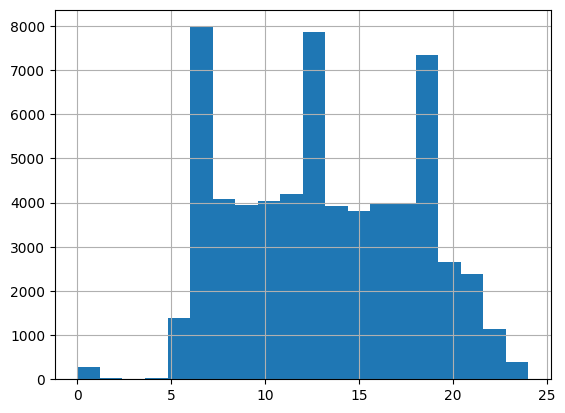

In [76]:
df['DepTime_Hour'].hist(bins=20)

<Axes: >

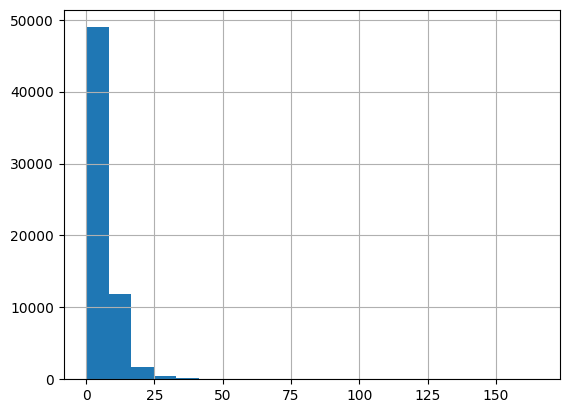

In [71]:
df['TaxiIn'].hist(bins=20)

<Axes: >

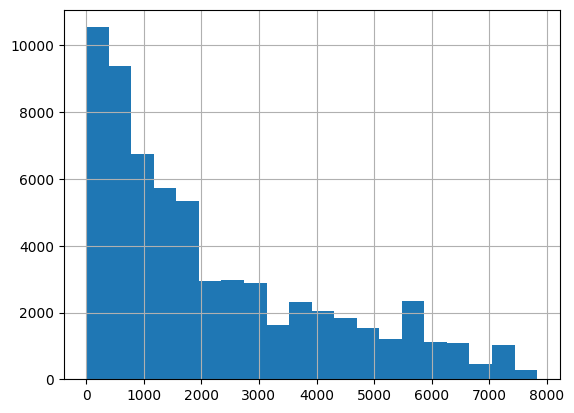

In [72]:
df['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Признаки на графиках имеют различные диапазоны значений, и алгоритмы машинного обучения могут иметь проблемы с обработкой таких признаков. Поэтому нужно масштабировать данные, чтобы привести значений к определенному диапазону или масштабу.

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

- Числовые признаки — это признаки, которые содержат только числа.
- Категориальные признаки — это наименования или метки.

In [13]:
num_features = df.select_dtypes(include=['number']).columns
cat_features = df.select_dtypes(include=['object']).columns
print(num_features)
print(cat_features)

Index(['Month', 'DayofMonth', 'DayOfWeek', 'FlightNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance',
       'TaxiIn', 'TaxiOut', 'Cancelled', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'CRSDepTime_Hour', 'CRSDepTime_Minute', 'CRSArrTime_Hour',
       'CRSArrTime_Minute'],
      dtype='object')
Index(['UniqueCarrier', 'Origin', 'Dest', 'CancellationCode'], dtype='object')


In [15]:
from sklearn.preprocessing import StandardScaler


def transform_data(df):
  df[num_features] = df[num_features].fillna(0)
  df[cat_features] = df[cat_features].fillna('nan')
  scaler = StandardScaler()
  df[num_features] = scaler.fit_transform(df[num_features])
  df = pd.get_dummies(df, columns=cat_features, drop_first=True)
  return df

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [16]:
edited_df = transform_data(df)
edited_df.shape[1]

636

**16. (1 балл)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)).

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(edited_df, y, test_size=0.3, random_state=42)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (1 балл)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [19]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train[:1000], y_train[:1000])
y_train_pred = reg.predict(X_train[:1000]) # только для обучающей надо брать 1000
y_test_pred = reg.predict(X_test)

In [30]:
reg.coef_

array([ 2.98347923e-15, -3.55271368e-15, -2.84217094e-14, -1.59872116e-14,
       -4.05194831e+00,  1.45285338e+00,  2.48215331e+00,  8.12615198e-01,
        3.52967437e+01,  7.77156117e-16,  1.78837382e-01,  4.16305055e-01,
       -5.40503947e-01, -2.11758343e-01,  5.32907052e-15, -1.55431223e-14,
        6.66133815e-15, -1.22124533e-14,  6.21724894e-15, -3.28626015e-14,
       -3.97425148e-15,  6.88338275e-15, -5.66213743e-15, -1.66533454e-15,
       -3.14624303e-01, -2.33146835e-14, -4.44089210e-15, -5.55111512e-15,
       -1.77635684e-15,  1.33226763e-14,  1.19904087e-14, -1.20181642e-14,
       -3.46389584e-14,  8.88178420e-15, -7.99360578e-15, -1.55431223e-15,
        3.55271368e-15,  2.66453526e-15, -7.54951657e-15, -1.06581410e-14,
       -2.70894418e-14,  4.44089210e-15, -5.73220071e-02, -5.73220071e-02,
       -5.73220071e-02,  1.04849867e-03, -1.92166080e-02, -5.73220071e-02,
       -6.84007667e-04,  1.99101385e-03,  9.59152656e-03, -9.96837089e-03,
        1.13984542e-03, -

Отрицательный коэффициент регрессии указывает на отрицательную взаимосвязь между предикторной переменной и переменной отклика. Это означает, что при увеличении предикторной переменной переменная отклика имеет тенденцию к уменьшению, а при уменьшении предикторной переменной переменная отклика имеет тенденцию к увеличению. Другими словами, независимая переменная и зависимая переменная имеют тенденцию двигаться в противоположных направлениях.

In [31]:
reg.intercept_

10.822501343246255

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse_train = mean_squared_error(y_train[:1000], y_train_pred)
r2_score_train = r2_score(y_train[:1000], y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_score_test = r2_score(y_test, y_test_pred)

In [25]:
print(mse_train)
print(r2_score_train)

print(mse_test)
print(r2_score_test)

3.076574096440956e-27
1.0
0.3912027853152891
0.9997075488809246


Видим, что mse_train 3,07, а mse_test 0,3. Чем меньше значение MSE, тем лучше, значит, результат на контрольной выборке лучше, чем на обучающей. Высокое значение MSE означает, что модель неэффективна, и есть большая разница между предсказанными и true значениями.

Показатель R2 на контрольной выборке составил 0,99, что очень близко к идеалу. А показатель R2 на обучающей выборке равен 1, значит, что наша модель идеальна.

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**18. (1 доп. балл)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.17. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [38]:
from sklearn.model_selection import KFold
import numpy as np
alphas = np.arange(1, 100, 5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [40]:
from sklearn.linear_model import LassoCV, RidgeCV
alphas = np.arange(1, 100, 5)

model_1 = LassoCV(alphas=alphas, cv=kf).fit(X_train[:1000], y_train[:1000])
model_2 = RidgeCV(alphas=alphas, cv=kf).fit(X_train[:1000], y_train[:1000])

In [42]:
y_train_pred_1 = model_1.predict(X_train[:1000])
y_test_pred_1 = model_1.predict(X_test)

mse_train = mean_squared_error(y_train[:1000], y_train_pred_1)
r2_score_train = r2_score(y_train[:1000], y_train_pred_1)

mse_test = mean_squared_error(y_test, y_test_pred_1)
r2_score_test = r2_score(y_test, y_test_pred_1)

print(mse_train)
print(r2_score_train)

print(mse_test)
print(r2_score_test)

1.2259693583481437
0.9988432250672266
1.548782814708614
0.9988421778055561


In [43]:
y_train_pred_2 = model_2.predict(X_train[:1000])
y_test_pred_2 = model_2.predict(X_test)

mse_train = mean_squared_error(y_train[:1000], y_train_pred_2)
r2_score_train = r2_score(y_train[:1000], y_train_pred_2)

mse_test = mean_squared_error(y_test, y_test_pred_2)
r2_score_test = r2_score(y_test, y_test_pred_2)

print(mse_train)
print(r2_score_train)

print(mse_test)
print(r2_score_test)

0.03407842676880601
0.9999678449795126
0.6449248498363481
0.9995178741022966


MSE на обучающей выборке меньше, чем на контрольной. r2_score близко к нулю

In [44]:
print('Coefficients: \n', model_1.coef_)

Coefficients: 
 [-0.          0.          0.         -0.          0.          0.
  0.          0.         34.81987318  0.          0.          0.
  0.         -0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.         -0.          0.          0.         -0.          0.
 -0.         -0.         -0.         -0.         -0.          0.
 -0.          0.         -0.          0.         -0.          0.
  0.         -0.          0.          0.          0.         -0.
  0.          0.          0.          0.          0.          0.
 -0.          0.          0.         -0.         -0.         -0.
 -0.         -0.          0.          0.          0.         -0.
  0.         -0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.         -0.
  0.         -0.          0.          0.          0.          0.
  0.          0.          0.         -0.          0.          0.
 -0.     

In [45]:
print('Coefficients: \n', model_2.coef_)

Coefficients: 
 [ 7.48839732e-04 -4.00421625e-04  1.60177410e-02 -1.54800937e-02
 -4.31525844e+00  7.56185052e+00 -3.48476149e+00  4.67216287e+00
  3.13082243e+01  2.96645045e-01 -2.73281393e-01 -7.20372584e-01
  3.17115984e-30 -8.65599760e-01  2.53881002e-01  1.16528086e-01
  1.33329075e-01  2.44582960e-02  2.57849943e-01  2.48462969e-02
 -1.05606551e-03 -1.23088553e-03  6.69224583e-05 -4.04562803e-02
  0.00000000e+00 -7.12939499e-02 -2.95353019e-02  1.09231015e-01
 -4.59642127e-02  3.43338332e-02  1.96080787e-02 -8.65439503e-02
 -2.90767477e-04  4.77619090e-03 -1.74269870e-02  8.96436887e-02
  3.27309203e-02  1.53604999e-02 -7.96189137e-02 -4.16610873e-02
  7.44521996e-02 -7.48309040e-03  3.15421861e-01 -3.71327644e-02
 -1.81250418e-02  0.00000000e+00  0.00000000e+00 -1.11055788e-01
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  6.04661200e-02  0.00000000e+00
  0.00000000e+00 -2.86691874e-02 -7.10884346e-03  7.65936547e-02
 -9.17553

В отличие от L2-регуляризации, L1 обнуляет веса при всех признаках

In [47]:
# https://github.com/tsopronyuk/Linear-regression--retraining-and-regularization--Python-
from sklearn.linear_model import Lasso, Ridge
alphas = np.arange(1, 500, 50)
coefs_lasso = np.zeros((alphas.shape[0], X_train[:1000].shape[1]))
coefs_ridge = np.zeros((alphas.shape[0], X_train[:1000].shape[1]))

for i, a in enumerate(alphas):
    regrL = Lasso(alpha=a)
    regrL.fit(X_train[:1000], y_train[:1000])
    weights=regrL.coef_
    for j, weight in enumerate(weights):
        coefs_lasso[i,j]=weight

for i, a in enumerate(alphas):
    regrR = Ridge(alpha=a)
    regrR.fit(X_train[:1000], y_train[:1000])
    weights=regrR.coef_
    for j, weight in enumerate(weights):
        coefs_ridge[i,j]=weight

In [50]:
coefs_lasso

array([[-0.,  0.,  0., ...,  0.,  0.,  0.],
       [-0.,  0.,  0., ...,  0.,  0.,  0.],
       [-0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [-0.,  0.,  0., ...,  0.,  0.,  0.],
       [-0.,  0.,  0., ...,  0.,  0.,  0.],
       [-0.,  0.,  0., ...,  0.,  0.,  0.]])

In [51]:
coefs_ridge

array([[ 0.00074884, -0.00040042,  0.01601774, ...,  0.        ,
         0.        ,  0.        ],
       [-0.05479456, -0.03636323,  0.21899803, ...,  0.        ,
         0.        ,  0.        ],
       [-0.07165103, -0.03830991,  0.25259562, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.12382647, -0.02003897,  0.20431457, ...,  0.        ,
         0.        ,  0.        ],
       [-0.1317837 , -0.01569585,  0.19186284, ...,  0.        ,
         0.        ,  0.        ],
       [-0.13904328, -0.01146156,  0.18032859, ...,  0.        ,
         0.        ,  0.        ]])

### Градиентный спуск (НА БОНУС)

**Все баллы отсюда идут в копилку бонусов**

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**19. (0 баллов)** Добавьте к объектам обеих выборок из п. 16 единичный признак.

In [53]:
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

**20. (0.5 доп. балла)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [56]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    pass

In [ ]:
# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    pass

In [ ]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    pass

In [ ]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, X, y):
    pass

In [ ]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    pass

**21. (0.5 доп. балла)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.

Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [ ]:
def grad_descent(X, y, step_size, max_iter, eps, is_reg):
    # Your code here

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

In [ ]:
# Your code here

**22. (0.5 доп. балла)** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

In [ ]:
# Your code here

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту.

**23. (0.5 доп. балла)**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [ ]:
def sgd(X, y, step_size, max_iter, eps, is_reg):
    # Your code here

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

In [ ]:
# Your code here

**24. (0.5 доп. балла)** Аналогично п.22 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

In [ ]:
# Your code here

**25. (0.5 доп. балла)** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.22? Почему?

In [ ]:
# Your code here